#### Introduction

This is a simple excercise for practicing linear regression Label Encoding or One-hot Encoding, a very basic ML algorithm, also will measure the accuracy of the model. KPIs for the model accuracy are below:

1. RMSE
2. MAE
3. MAPE
4. MSE
5. R squared

Also, we will discuss the coefficients and the y-intercept value of the linear regression model for each feature.

We will use a data set from kaggle (source: https://www.kaggle.com/aishwaryamuthukumar/cars-dataset-audi-bmw-ford-hyundai-skoda-vw).

#### Importing Libraries

As the first step, import the libraries required (this process is iterative, we might come back at the middle of the coding to add a new library).

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing data file

At this step, import the data set, we are importing it from github here.

In [47]:
df = pd.read_csv("https://raw.githubusercontent.com/SKawsar/Data_Visualization_with_Python/main/bmw.csv")
df.head() #to check if the data loaded correctly

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,50.4,3.0


The first step of this task, loading the required data, is done. Lets describe the features for easy understanding:

Model: represent the model of the car.

Year: Year the model was launched.

Price: reselling price of the car.

Transmission: Transmission type of the car.

Mileage: total distance the car already travelled.

fuelType: fuel the car required.

mpg: Distance travelled per gallon of fuel.

engineSize: The engine size of the car.

Now, check the features more closely, which features are numeric and which are object.

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   mpg           10781 non-null  float64
 7   engineSize    10781 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 673.9+ KB


In [49]:
#check for missing value
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
mpg             0
engineSize      0
dtype: int64

We have 3 columns with "object" data type. we want to convert these to numeric data type, we are considering either label encoding or one-hot encoding.

Label encoding: In this technique, the categorial variables turned to numeric variable. a unique integer is assigned based on alphabetical order. As this is kind of "ordinal" or "ranked", so it is possible that the model would get confused thinking that there exists a "rank", which actually is not true. This is the limitaion of this concept.

One-hot encoding: This is a technique by which all the unique value of a particular column (feature) separated into different column (feature). If a column contains a large number of unique values, it will be separated into high number of columns, which might make the model slower. Also, there is a "Dummy Variable Trap", the individual effect of a dummy variable cant be interpretted well because of the colinearity.

Though both of these techniques have their own limitations, but in general, label encoding is not practiced if the categorial variables are not of "ordinal" type, we assume the one-hot encoding suits better here, but we will try both method and compare the results.

### Prediction using One-hot encoding

First pre-process the dataframe converting categorial variables to numeric.

In [50]:
df_with_one_hot_encoding = pd.get_dummies(df, drop_first=True)

In [51]:
df_with_one_hot_encoding.head() #to check if the data loaded correctly

,year,price,mileage,mpg,engineSize,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,...,model_ Z3,model_ Z4,model_ i3,model_ i8,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2014,11200,67068,57.6,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2018,27000,14827,42.8,2.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,2016,16000,62794,51.4,3.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,12750,26676,72.4,1.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,14500,39554,50.4,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
#Defining  features and target variable
X = df_with_one_hot_encoding.drop(["price"], axis=1)
Y = df_with_one_hot_encoding ["price"]

In [53]:
#splitting the dataset into train and test set (80 and 20% respectively)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [54]:
#apply linear regression
model = LinearRegression()
model.fit(X_train, y_train)
model.predict(X_test)

array([35930.36611772, 20216.87289285, 17494.552455  , ...,
       20976.40871838, 31293.60928766, 12143.40083457])

Now, we will  explore the co-efficient and the intercept of the features, simple linear regression model just follow the equation of a straight line, y = c + m*x, here c is the intercept (the portion it cut from the Y axis when x=0, this is a constant), and m is the slope (can be defined  in many ways, like the ratio of rise and run, the ratio of the changes in Y-axis to the changein the X-axis, the angel it creates with X-axis in anti-clockwise direction), we will not go into details of the definition, just will remember, a positive slope means the feature is positively related with the target (if the value of the feature increases, the target valus also increases), and if the slope is negative, then  the feature  is negatively related to the target (if the feature value increases the variable decreases and vice versa). The larger the value, the influencial it is.

In [55]:
#co-efficient of the features
coefficients = pd.DataFrame({'features':X.columns, 'coefficients':np.squeeze(model.coef_)})
coefficients = coefficients.sort_values(by='coefficients')
display(coefficients)

,features,coefficients
32,fuelType_Petrol,-915.650845
27,transmission_Manual,-333.036357
4,model_ 2 Series,-210.777037
2,mpg,-109.351386
1,mileage,-0.106672
28,transmission_Semi-Auto,925.096168
0,year,1859.872442
16,model_ X1,2136.357102
6,model_ 4 Series,2453.097820
5,model_ 3 Series,2506.063865


From above, we can say that, only five features are related negatively with the "price", rest all are positively co-related, out of five negatively co-related features, one is very insignificant (mileage), rest all seems storgely influencing the price of the car.

In [56]:
model.intercept_

-3731445.814468145

Interpretation of the intercept is not straightforward always. In one sense, this is the value of "target" when all value of the "features" are zero. But everytime it doesnt make same senses, for say, here the intercept value is minus, it doesn't mean if all features become zero, the price  will be negative. Also, intercept is termed as  the "error" of the model. 

Now, we will focus on the accuracy of the model, we will calculate MAE, MAPE, MSE, RMSE, coefficient of determination values of the model.

As a first step, we will create a dataset for ease of calculation.

In [57]:
y_actual = y_test
y_predicted = model.predict(X_test)
df_accuracy_one_hot_encoded_dataframe = pd.DataFrame({"y_actual":y_actual,
                   "y_predicted": y_predicted})



df_accuracy_one_hot_encoded_dataframe["dif"] = df_accuracy_one_hot_encoded_dataframe["y_actual"] - df_accuracy_one_hot_encoded_dataframe["y_predicted"]
df_accuracy_one_hot_encoded_dataframe["abs_error"] = np.abs(df_accuracy_one_hot_encoded_dataframe["dif"])
df_accuracy_one_hot_encoded_dataframe["squared_error"] = df_accuracy_one_hot_encoded_dataframe["dif"]**2

df_accuracy_one_hot_encoded_dataframe["actual_subtract_mean"] = df_accuracy_one_hot_encoded_dataframe["y_actual"] - df_accuracy_one_hot_encoded_dataframe["y_actual"].mean()
df_accuracy_one_hot_encoded_dataframe["squared_actual_subtract_mean"] = df_accuracy_one_hot_encoded_dataframe["actual_subtract_mean"]**2


display(df_accuracy_one_hot_encoded_dataframe)

,y_actual,y_predicted,dif,abs_error,squared_error,actual_subtract_mean,squared_actual_subtract_mean
3840,35470,35930.366118,-460.366118,460.366118,2.119370e+05,12640.937413,1.597933e+08
7757,15490,20216.872893,-4726.872893,4726.872893,2.234333e+07,-7339.062587,5.386184e+07
10325,17000,17494.552455,-494.552455,494.552455,2.445821e+05,-5829.062587,3.397797e+07
685,10991,9393.922577,1597.077423,1597.077423,2.550656e+06,-11838.062587,1.401397e+08
1947,21050,21401.012650,-351.012650,351.012650,1.232099e+05,-1779.062587,3.165064e+06
...,...,...,...,...,...,...,...
9964,19980,22465.690942,-2485.690942,2485.690942,6.178659e+06,-2849.062587,8.117158e+06
2039,33980,29003.344816,4976.655184,4976.655184,2.476710e+07,11150.937413,1.243434e+08
1608,19372,20976.408718,-1604.408718,1604.408718,2.574127e+06,-3457.062587,1.195128e+07
6951,35793,31293.609288,4499.390712,4499.390712,2.024452e+07,12963.937413,1.680637e+08


In [58]:
# mean absolute error (MAE): mean of absolute errors, where absolute errors are the difference between actual value and predicted value. lower is better
MAE = df_accuracy_one_hot_encoded_dataframe["abs_error"].mean()
print("MAE = ", MAE)

# Mean Absolute Percentage Error (MAPE): It measures this accuracy as a percentage, and can be calculated as the average absolute percent error, it is the difference between actual values and predicted values divided by actual values. lower is better
MAPE = np.round(np.mean(df_accuracy_one_hot_encoded_dataframe["abs_error"]/df_accuracy_one_hot_encoded_dataframe["y_actual"])*100, 2)
print("MAPE = ", MAPE)

# mean squared error (MSE): mean of square of the difference between the actual value and predicted value. lower is better
MSE = df_accuracy_one_hot_encoded_dataframe["squared_error"].mean()
print("MSE = ", MSE)

# root mean squared error: simply the root of MSE. lower is better
RMSE = np.round(np.sqrt(MSE), 2)
print("RMSE = ", RMSE)

# coefficient of determination == r_squared: The coefficient of determination is a statistical measurement that examines how differences in one variable can be explained by the difference in a second variable, when predicting the outcome of a given event. In other words, this coefficient, which is more commonly known as R-squared (or R2), assesses how strong the linear relationship is between two variables. greater is better. Max =1, min=-
r_squared = np.round(1- df_accuracy_one_hot_encoded_dataframe["squared_error"].sum()/df_accuracy_one_hot_encoded_dataframe["squared_actual_subtract_mean"].sum(), 2)
print("r_squared = ", r_squared)

MAE =  2822.7347109462585
MAPE =  15.59
MSE =  19032611.6910384
RMSE =  4362.64
r_squared =  0.85


Now, we will compare the prediction in reference to the actual values, and see some visualization.

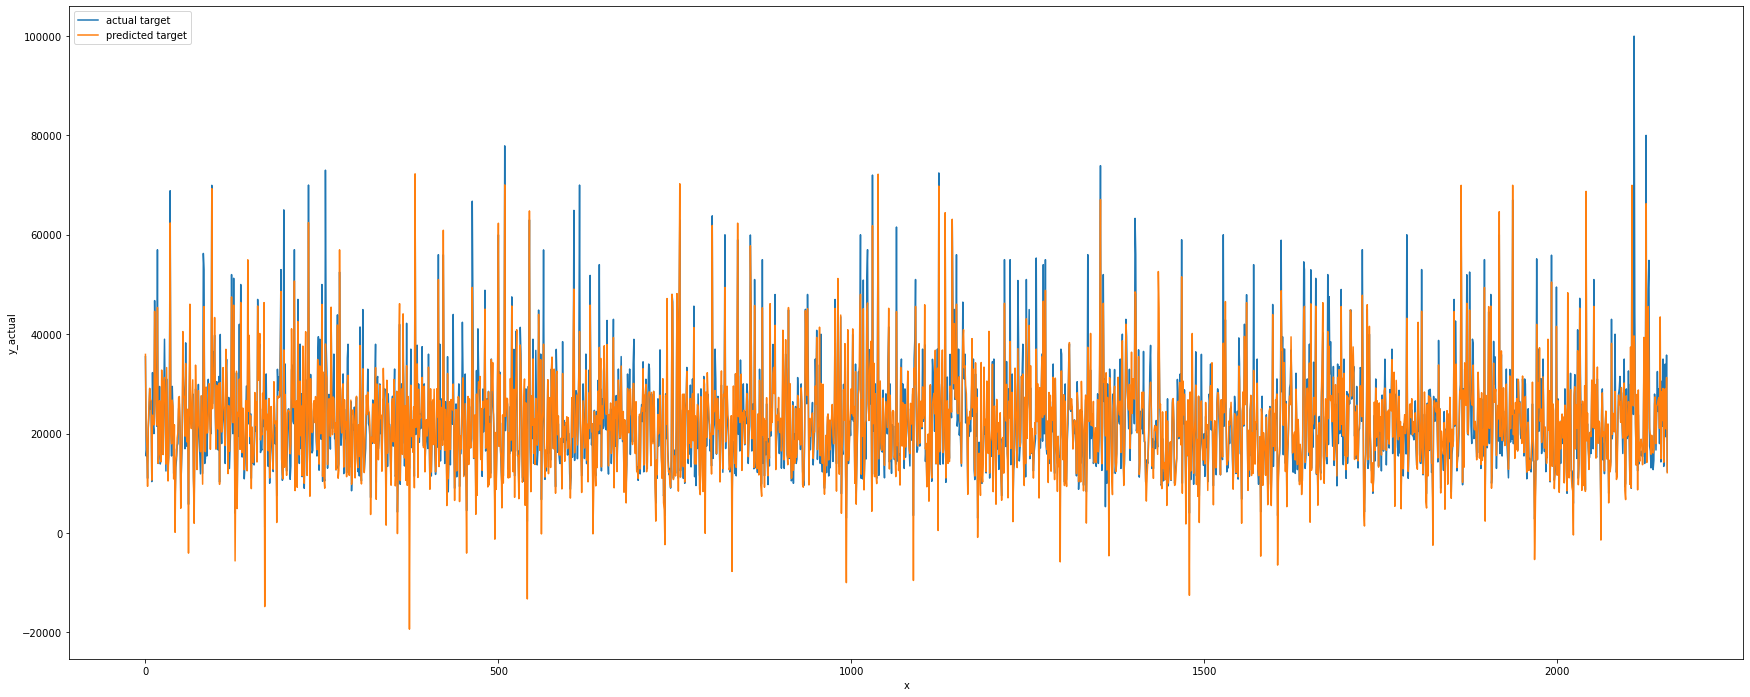

In [59]:
df_for_visualization = pd.DataFrame({"y_actual":y_actual,
                   "y_predicted": y_predicted})
df_for_visualization['x'] = np.arange(0,y_test.shape[0],1).tolist()

plt.figure(figsize=(30,12))

sns.lineplot(x='x', y='y_actual', data=df_for_visualization, label='actual target')
sns.lineplot(x='x', y='y_predicted', data=df_for_visualization, label='predicted target')
plt.show()

From above figure, we can see, some values differe significantly. Below figure shows the nature of the "predicted" values (which are aligned along a straight line as we use linear regression model), but actual values are scaterred around this line excluding some outliars (wthose points are far away from the straight line.

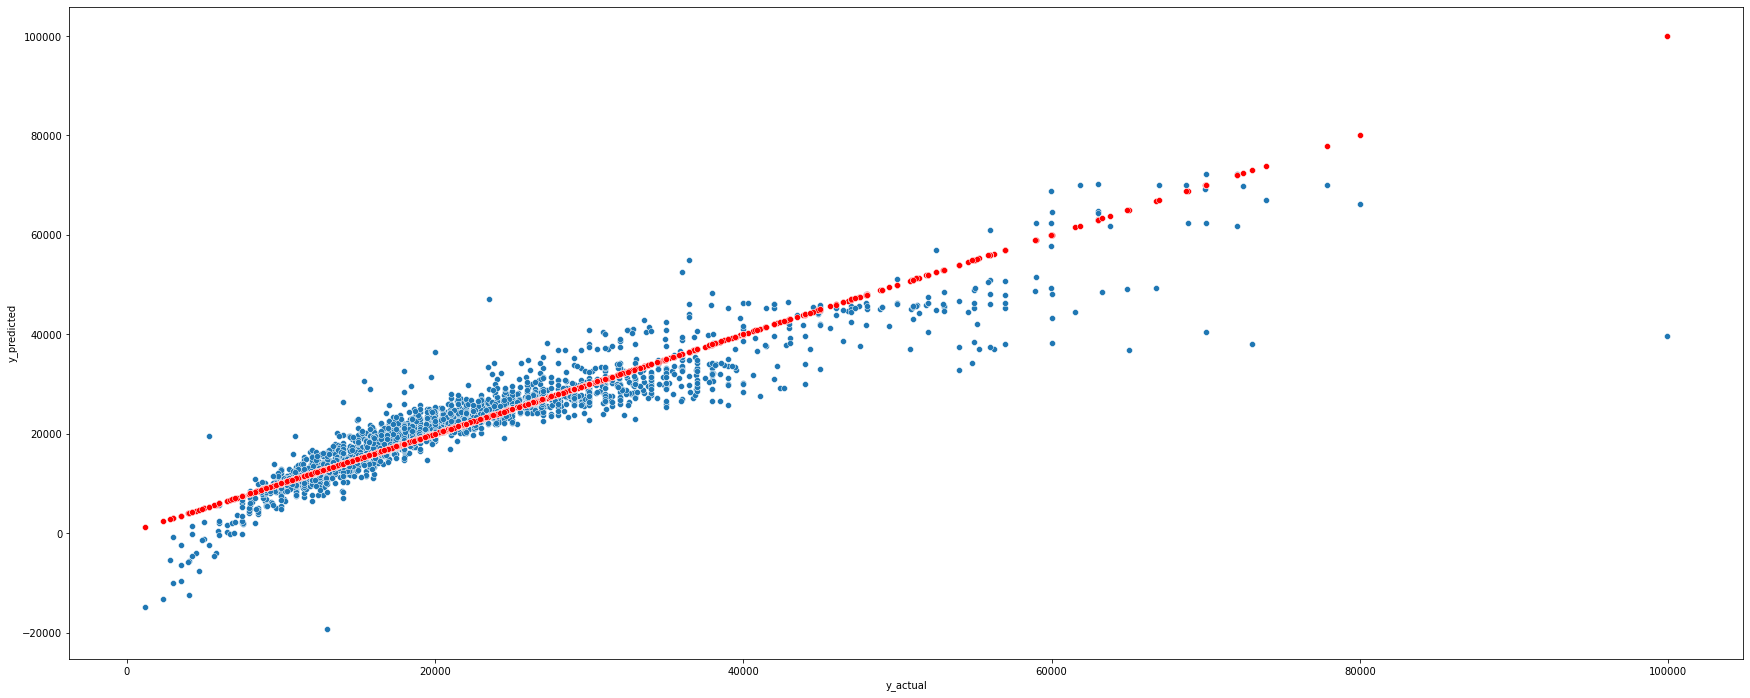

In [60]:
plt.figure(figsize=(30,12))

sns.scatterplot(x='y_actual', y='y_predicted', data=df_for_visualization)

sns.scatterplot(x='y_actual', y='y_actual', data=df_for_visualization, color='red')
plt.show()

### Prediction using label encoding

Just to compare the result with the one-hot encoding and validate the assumption (initially we assume one-hot encoding would perform better for this problem), we will apply linear regression to the data set where categorical variables are converted to numeric  variables using label encoding.

First prepare the dataset.

In [61]:
df_with_label_encoding = df.copy()
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'fuelType'. 
df_with_label_encoding['fuelType']= label_encoder.fit_transform(df_with_label_encoding["fuelType"])
# Encode labels in column 'model'. 
df_with_label_encoding['model']= label_encoder.fit_transform(df_with_label_encoding["model"])
# Encode labels in column 'transmission'. 
df_with_label_encoding['transmission']= label_encoder.fit_transform(df_with_label_encoding["transmission"])
df_with_label_encoding.head()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,4,2014,11200,0,67068,0,57.6,2.0
1,5,2018,27000,0,14827,4,42.8,2.0
2,4,2016,16000,0,62794,0,51.4,3.0
3,0,2017,12750,0,26676,0,72.4,1.5
4,6,2014,14500,0,39554,0,50.4,3.0


In [62]:
#Defining  features and target variable
X_alt = df_with_label_encoding.drop(["price"], axis=1)
Y_alt = df_with_label_encoding ["price"]

In [63]:
#splitting the dataset into train and test set (80 and 20% respectively)
X_train, X_test, y_train, y_test = train_test_split(X_alt, Y_alt, test_size=0.2, random_state=1)
model.fit(X_train, y_train)
model.predict(X_test)

array([33258.14791251, 21823.50366655, 19175.81460851, ...,
       25520.73351826, 30132.28606162, 13320.61160242])

In [64]:
y_actual = y_test
y_predicted = model.predict(X_test)
df_accuracy_label_encoded_dataframe = pd.DataFrame({"y_actual":y_actual,
                   "y_predicted": y_predicted})



df_accuracy_label_encoded_dataframe["dif"] = df_accuracy_label_encoded_dataframe["y_actual"] - df_accuracy_label_encoded_dataframe["y_predicted"]
df_accuracy_label_encoded_dataframe["abs_error"] = np.abs(df_accuracy_label_encoded_dataframe["dif"])
df_accuracy_label_encoded_dataframe["squared_error"] = df_accuracy_label_encoded_dataframe["dif"]**2

df_accuracy_label_encoded_dataframe["actual_subtract_mean"] = df_accuracy_label_encoded_dataframe["y_actual"] - df_accuracy_label_encoded_dataframe["y_actual"].mean()
df_accuracy_label_encoded_dataframe["squared_actual_subtract_mean"] = df_accuracy_label_encoded_dataframe["actual_subtract_mean"]**2


display(df_accuracy_label_encoded_dataframe)

,y_actual,y_predicted,dif,abs_error,squared_error,actual_subtract_mean,squared_actual_subtract_mean
3840,35470,33258.147913,2211.852087,2211.852087,4.892290e+06,12640.937413,1.597933e+08
7757,15490,21823.503667,-6333.503667,6333.503667,4.011327e+07,-7339.062587,5.386184e+07
10325,17000,19175.814609,-2175.814609,2175.814609,4.734169e+06,-5829.062587,3.397797e+07
685,10991,7802.083582,3188.916418,3188.916418,1.016919e+07,-11838.062587,1.401397e+08
1947,21050,26582.029425,-5532.029425,5532.029425,3.060335e+07,-1779.062587,3.165064e+06
...,...,...,...,...,...,...,...
9964,19980,22939.920543,-2959.920543,2959.920543,8.761130e+06,-2849.062587,8.117158e+06
2039,33980,30344.665230,3635.334770,3635.334770,1.321566e+07,11150.937413,1.243434e+08
1608,19372,25520.733518,-6148.733518,6148.733518,3.780692e+07,-3457.062587,1.195128e+07
6951,35793,30132.286062,5660.713938,5660.713938,3.204368e+07,12963.937413,1.680637e+08


In [65]:
# mean absolute error (MAE): mean of absolute errors, where absolute errors are the difference between actual value and predicted value. lower is better
MAE = df_accuracy_label_encoded_dataframe["abs_error"].mean()
print("MAE = ", MAE)

# Mean Absolute Percentage Error (MAPE): It measures this accuracy as a percentage, and can be calculated as the average absolute percent error, it is the difference between actual values and predicted values divided by actual values. lower is better
MAPE = np.round(np.mean(df_accuracy_label_encoded_dataframe["abs_error"]/df_accuracy_label_encoded_dataframe["y_actual"])*100, 2)
print("MAPE = ", MAPE)

# mean squared error (MSE): mean of square of the difference between the actual value and predicted value. lower is better
MSE = df_accuracy_label_encoded_dataframe["squared_error"].mean()
print("MSE = ", MSE)

# root mean squared error: simply the root of MSE. lower is better
RMSE = np.round(np.sqrt(MSE), 2)
print("RMSE = ", RMSE)

# coefficient of determination == r_squared: The coefficient of determination is a statistical measurement that examines how differences in one variable can be explained by the difference in a second variable, when predicting the outcome of a given event. In other words, this coefficient, which is more commonly known as R-squared (or R2), assesses how strong the linear relationship is between two variables. greater is better. Max =1, min=-
r_squared = np.round(1- df_accuracy_label_encoded_dataframe["squared_error"].sum()/df_accuracy_label_encoded_dataframe["squared_actual_subtract_mean"].sum(), 2)
print("r_squared = ", r_squared)

MAE =  3945.6572743597308
MAPE =  21.0
MSE =  34491085.04843776
RMSE =  5872.91
r_squared =  0.73


After comparison,  we find that all indices are better when we applied one-hot encoding (though there might be a scope of improvement, which we can tell after trying few more model), so our previous assumption was correct.

And this is the end of our excercise.